In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 匯入資料(`stata`)(`.dta`)
- `pd.read_stata`: `stata`的資料檔Excel無法直接開啟。
- 匯入網路上的資料，需輸入網址位置。

In [2]:
df1 = pd.read_stata('https://github.com/QuantEcon/QuantEcon.lectures.code/raw/master/ols/maketable1.dta')
df1.head()

,shortnam,euro1900,excolony,avexpr,logpgp95,cons1,cons90,democ00a,cons00a,extmort4,logem4,loghjypl,baseco
0,AFG,0.000000,1.0,NaN,NaN,1.0,2.0,1.0,1.0,93.699997,4.540098,NaN,NaN
1,AGO,8.000000,1.0,5.363636,7.770645,3.0,3.0,0.0,1.0,280.000000,5.634789,-3.411248,1.0
2,ARE,0.000000,1.0,7.181818,9.804219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ARG,60.000004,1.0,6.386364,9.133459,1.0,6.0,3.0,3.0,68.900002,4.232656,-0.872274,1.0
4,ARM,0.000000,0.0,NaN,7.682482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 變數說明
- logpgp95: logGDP per capita adjusted by PPP in 1995. (國家GDP)
- avexpr: an index of protection against expropriation.(反政府徵收能力)(0~10)

### 相關性(`avexpr`, `logpgp95`)
- 散布圖: `scatter`
- `plt.scatter(x= xdata,y=ydata)`
- `data.plot(x='',y='',kind='scatter')`

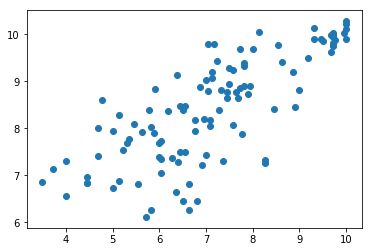

In [3]:
plt.scatter(x= df1['avexpr'],y = df1['logpgp95'])
plt.show()

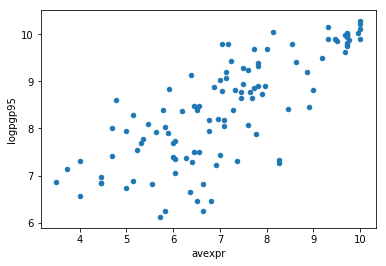

In [4]:
df1.plot(x='avexpr', y='logpgp95', kind='scatter')
plt.show()

- 更細緻的圖形呈現: `plt.style.use(seaborn)`

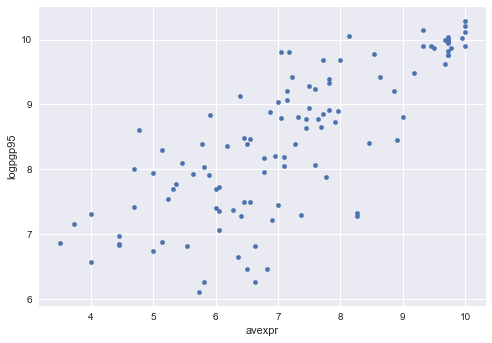

In [5]:
plt.style.use('seaborn')
df1.plot(x='avexpr', y='logpgp95', kind='scatter')
plt.show()

### 清理資料
- 刪除遺漏值 `dropna`: 針對遺漏值為`NaN`的情況
- 針對特定變數 `subset = []`

In [6]:
df1_subset = df1.dropna(subset = ['logpgp95','avexpr']) 

In [7]:
df1_subset.head()

,shortnam,euro1900,excolony,avexpr,logpgp95,cons1,cons90,democ00a,cons00a,extmort4,logem4,loghjypl,baseco
1,AGO,8.000000,1.0,5.363636,7.770645,3.0,3.0,0.0,1.0,280.000000,5.634789,-3.411248,1.0
2,ARE,0.000000,1.0,7.181818,9.804219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ARG,60.000004,1.0,6.386364,9.133459,1.0,6.0,3.0,3.0,68.900002,4.232656,-0.872274,1.0
5,AUS,98.000000,1.0,9.318182,9.897972,7.0,7.0,10.0,7.0,8.550000,2.145931,-0.170788,1.0
6,AUT,100.000000,0.0,9.727273,9.974877,NaN,NaN,NaN,NaN,NaN,NaN,-0.343900,NaN


### 選特定資料進行分析 (baseco == 1)
- `df1_subset[df1_subset['baseco'] == 1]`

In [8]:
df1_subset = df1_subset[df1_subset['baseco'] == 1]
df1_subset.head()

,shortnam,euro1900,excolony,avexpr,logpgp95,cons1,cons90,democ00a,cons00a,extmort4,logem4,loghjypl,baseco
1,AGO,8.000000,1.0,5.363636,7.770645,3.0,3.0,0.0,1.0,280.000000,5.634789,-3.411248,1.0
3,ARG,60.000004,1.0,6.386364,9.133459,1.0,6.0,3.0,3.0,68.900002,4.232656,-0.872274,1.0
5,AUS,98.000000,1.0,9.318182,9.897972,7.0,7.0,10.0,7.0,8.550000,2.145931,-0.170788,1.0
11,BFA,0.000000,1.0,4.454545,6.845880,3.0,1.0,0.0,1.0,280.000000,5.634789,-3.540459,1.0
12,BGD,0.000000,1.0,5.136364,6.877296,7.0,2.0,0.0,1.0,71.410004,4.268438,-2.063568,1.0


- 設定依變數(y)與自變數資料(X)

In [9]:
X = df1_subset['avexpr']
y = df1_subset['logpgp95']
labels = df1_subset['shortnam']

### 畫出論文中`Figure 2`的結果
- 散布圖
- 找出配適直線 `polyfit(x,y,1)`
- 給定方程式 `poly1d([a,b])`

In [10]:
np.poly1d(np.polyfit(X, y, 1))([2,3,4,5])

array([5.70459736, 6.22670439, 6.74881142, 7.27091845])

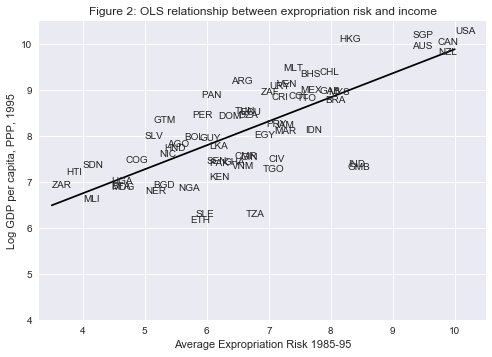

In [12]:
plt.scatter(X, y, marker='')
for i, label in enumerate(labels):
    # 圖形中添加注釋 
    # plt.annotate(添加注釋內容, (位置))
    plt.annotate(label, (X.iloc[i], y.iloc[i]))
plt.plot(np.unique(X),
         # 產生線性方程式 (poly1d)
         np.poly1d(np.polyfit(X, y, 1))(np.unique(X)),
         color='black')
plt.xlim([3.3,10.5])
plt.ylim([4,10.5])
plt.xlabel('Average Expropriation Risk 1985-95')
plt.ylabel('Log GDP per capita, PPP, 1995')
plt.title('Figure 2: OLS relationship between expropriation risk and income')
plt.show()

### 建立簡單線性模型
$$
y = \beta_0 + \beta_1 x + \epsilon
$$
- y is the log GDP per capita (人均GDP取log)
- 也可以表示成
$$
logpgp95_i = \beta_0 + \beta_1 * avexpr_i + \epsilon_i
$$



In [14]:
# 簡單線性回歸中需要放入常數項 (1)
df1['const'] = 1

### 匯入回歸估計套件
- `statsmodels.api`
- `OLS(endog=y, exog=X, missing=遺漏值處理方式丟棄'drop')`
- 將配適結果記錄下來 `reg1.fit()`; `.summary()`

In [15]:
import statsmodels.api as sm

In [ ]:
reg1 = sm.OLS(endog=df1['logpgp95'], exog=df1[['const', 'avexpr']], missing='drop')
type(reg1)

In [ ]:
results = reg1.fit()
type(results)

In [ ]:
print(results.summary())

### 主要結果`summary`
- 常數項估計值 $\beta_0 = 4.6261^{***}$
- 斜率估計值 $\beta_1 = 0.5319^{***}$，這代表x增加的時候，y也會跟著增加。
- 模型解釋能力 $R^2 = 0.611 = 61.1\% $

$$
y_i = 4.63 + 0.53*X_i + \epsilon_i
$$

### 根據結果得到預測值
- 計算x的平均值
- 計算利用模型得到的估計值
- 計算利用模型與x的平均值得到的估計值

In [ ]:
mean_expr = np.mean(df1_subset['avexpr'])
mean_expr

In [ ]:
predicted_logpdp95 = 4.6261 + 0.5319 * 6.515625
predicted_logpdp95

In [ ]:
results.predict(exog=[1, mean_expr])

- 利用模型得到每個估計值與實際值

In [ ]:
# 丟棄遺漏值
df1_plot = df1.dropna(subset=['logpgp95', 'avexpr'])

# 劃出預測值
plt.scatter(df1_plot['avexpr'], results.predict(), alpha=0.5, label='predicted')
# 劃出觀測值
plt.scatter(df1_plot['avexpr'], df1_plot['logpgp95'], alpha=0.5, label='observed')


# 設定圖形標記
plt.legend()
plt.title('OLS predicted values')
plt.xlabel('avexpr')
plt.ylabel('logpgp95')
plt.show()

### 拓展簡單線性回歸
- 多重線性回歸 (multiple linear regression)
- 可建立多個回歸模型與結果:Model 1, 2, 3

In [18]:
# 匯入新資料 maketable2.dta
df2 = pd.read_stata('https://github.com/QuantEcon/QuantEcon.lectures.code/raw/master/ols/maketable2.dta')

In [22]:
# 增加一項常數項
df2['const'] = 1

In [23]:
# 生成不同自變數模型
y  = ['logpgp95'] 
X1 = ['const', 'avexpr']
X2 = ['const', 'avexpr', 'lat_abst']
X3 = ['const', 'avexpr', 'lat_abst', 'asia', 'africa', 'other']

In [24]:
# Estimate an OLS regression for each set of variables
reg1 = sm.OLS(df2['logpgp95'], df2[X1], missing='drop').fit()
reg2 = sm.OLS(df2['logpgp95'], df2[X2], missing='drop').fit()
reg3 = sm.OLS(df2['logpgp95'], df2[X3], missing='drop').fit()

### 建立回歸結果表格
- 匯入建立表格套件
- 設定輸出數據參數
- 觀察表格數據

In [30]:
# 匯入建立表格套件
from statsmodels.iolib.summary2 import summary_col
# 設定匯出數值參數 (dict格式)
# 制式設定可直接套用
info_dict={'R-squared' : lambda x: f"{x.rsquared:.2f}",
           'No. observations' : lambda x: f"{int(x.nobs):d}"}

results_table = summary_col(results=[reg1,reg2,reg3],
                            float_format='%0.2f',
                            stars = True,
                            model_names=['Model 1',
                                         'Model 3',
                                         'Model 4'],
                            info_dict=info_dict,
                            regressor_order=['const',
                                             'avexpr',
                                             'lat_abst',
                                             'asia',
                                             'africa'])
# 輸出表格標題
results_table.add_title('Table 2 - OLS Regressions')

print(results_table)


        Table 2 - OLS Regressions
                 Model 1 Model 3 Model 4 
-----------------------------------------
const            4.63*** 4.87*** 5.85*** 
                 (0.30)  (0.33)  (0.34)  
avexpr           0.53*** 0.46*** 0.39*** 
                 (0.04)  (0.06)  (0.05)  
lat_abst                 0.87*   0.33    
                         (0.49)  (0.45)  
asia                             -0.15   
                                 (0.15)  
africa                           -0.92***
                                 (0.17)  
other                            0.30    
                                 (0.37)  
R-squared        0.61    0.62    0.72    
No. observations 111     111     111     
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


### 內生性問題 (Endogeneity)
- 選擇工具變數(instrument variable, IV): `logem4`
- logem4: 在1900年抵抗歐洲的國家死亡率
- 檢查此變數與自變數的相關性: 高相關就可作為工具變數, IV

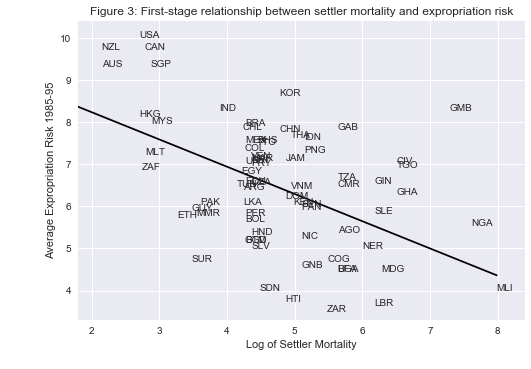

In [32]:
# Dropping NA's is required to use numpy's polyfit
df1_subset2 = df1.dropna(subset=['logem4', 'avexpr'])

X = df1_subset2['logem4']
y = df1_subset2['avexpr']
labels = df1_subset2['shortnam']

# Replace markers with country labels
plt.scatter(X, y, marker='')

for i, label in enumerate(labels):
    plt.annotate(label, (X.iloc[i], y.iloc[i]))

# Fit a linear trend line
plt.plot(np.unique(X),
         np.poly1d(np.polyfit(X, y, 1))(np.unique(X)),
         color='black')

plt.xlim([1.8,8.4])
plt.ylim([3.3,10.4])
plt.xlabel('Log of Settler Mortality')
plt.ylabel('Average Expropriation Risk 1985-95')
plt.title('Figure 3: First-stage relationship between settler mortality and expropriation risk')
plt.show()

###  建立IV-2SLS回歸
- 進行第一階段回歸
$$
avexpr_i = δ_0 + δ_1*logem4_i + v_i
$$
- 進行第二階段回歸
$$
 logpgp95_i = \hat{avexpr}_i + \epsilon_i 
$$

In [33]:
# Import and select the data
df4 = pd.read_stata('https://github.com/QuantEcon/QuantEcon.lectures.code/raw/master/ols/maketable4.dta')
df4 = df4[df4['baseco'] == 1]

In [34]:
# Add a constant variable
df4['const'] = 1

### 建立第一階段回歸
- y:原來的自變數, x:工具變數
$$
avexpr_i = δ_0 + δ_1*logem4_i + v_i
$$
- 根據此模型得到的預測值當作控制過後的自變數
- $\hat{y}$: 拿去第二階段回歸用

In [35]:
# Fit the first stage regression and print summary
results_fs = sm.OLS(df4['avexpr'],
                    df4[['const', 'logem4']],
                    missing='drop').fit()
print(results_fs.summary())

                            OLS Regression Results                            
Dep. Variable:                 avexpr   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     22.95
Date:                Tue, 27 Nov 2018   Prob (F-statistic):           1.08e-05
Time:                        10:55:24   Log-Likelihood:                -104.83
No. Observations:                  64   AIC:                             213.7
Df Residuals:                      62   BIC:                             218.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3414      0.611     15.296      0.0

### 建立第二階段回歸
- y: 原來的因變數. x: 第一階段回歸的預測值$\hat{y}$
$$
 logpgp95_i = \hat{avexpr}_i + \epsilon_i 
$$

In [38]:
df4['predicted_avexpr'] = results_fs.predict()

results_ss = sm.OLS(df4['logpgp95'],
                    df4[['const', 'predicted_avexpr']]).fit()
print(results_ss.summary())

                            OLS Regression Results                            
Dep. Variable:               logpgp95   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     56.60
Date:                Tue, 27 Nov 2018   Prob (F-statistic):           2.66e-10
Time:                        11:38:44   Log-Likelihood:                -72.268
No. Observations:                  64   AIC:                             148.5
Df Residuals:                      62   BIC:                             152.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.9097      0.823  

### 結論
- 兩階段回歸模型(IV-2SLS)給我們更穩健的回歸結果。
- 比較原始OLS與IV-2SLS模型結果的差異。
- IV-2SLS模型告訴我們，正向關係依舊存在。
- 接著將介紹直接利用套件完成此二階段模型

### 安裝套件
- 先到ananconda prompt輸入`conda install linearmodels`
- 匯入套件 `from linearmodels.iv import IV2SLS`

In [40]:
from linearmodels.iv import IV2SLS

In [41]:
iv = IV2SLS(dependent=df4['logpgp95'],
            exog=df4['const'],
            endog=df4['avexpr'],
            instruments=df4['logem4']).fit(cov_type='unadjusted')

print(iv.summary)

                          IV-2SLS Estimation Summary                          
Dep. Variable:               logpgp95   R-squared:                      0.1870
Estimator:                    IV-2SLS   Adj. R-squared:                 0.1739
No. Observations:                  64   F-statistic:                    37.568
Date:                Tue, Nov 27 2018   P-value (F-stat)                0.0000
Time:                        11:46:55   Distribution:                  chi2(1)
Cov. Estimator:            unadjusted                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const          1.9097     1.0106     1.8897     0.0588     -0.0710      3.8903
avexpr         0.9443     0.1541     6.1293     0.00